# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

# Importamos lo necesario

In [18]:
import numpy as np
import pandas as pd
from plotnine import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Parte 1
1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).

### Cargamos la los Datos 



In [19]:
print(open("tareaInformacion.txt", "r").read())
df_train = pd.read_csv("asteroidTrain.csv")
df_eval = pd.read_csv("asteroidEval.csv")

full_name: Object full name/designation
a: semi-major axis(au)
e: eccentricity
G: Magnitude slope parameter
i: Inclination with respect to x-y ecliptic plane(deg)
om: Longitude of the ascending node
w: argument of perihelion
q: perihelion distance(au)
ad: aphelion distance(au)
per_y: Orbital period
data_arc: data arc-span(d)
condition_code: Orbit condition code
n_obs_used: number of observations used
H: Absolute Magnitude parameter
diameter: diameter of the asteroid, variable to predict
extent: Object bi/tri axial ellipsoid dimensions(Km)
albedo: geometric albedo
rot_per: Rotation Period(h)
GM: Standard gravitational parameter, Product of mass and gravitational constant
BV: Color index B-V magnitude difference
UB: Color index U-B magnitude difference
IR: Color index I-R magnitude difference
spec_B: Spectral taxonomic type(SMASSII)
spec_T: Spectral taxonomic type(Tholen)
neo: Near Earth Object
pha: Potentially Hazardous Asteroids
moid: Earth Minimum orbit Intersection Distance(au)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.


Veamos que contienen los datos.

In [20]:
df_train

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,97632 (2000 EL145),3.069866,0.184417,NaN,3.620920,308.458533,249.570070,2.503729,3.636003,5.378824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.50522
1,49808 (1999 XD40),2.386539,0.104566,NaN,13.003513,105.866881,329.104052,2.136988,2.636089,3.686897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.16197
2,390390 (2013 WC84),3.018175,0.084529,NaN,14.247933,245.449168,115.242451,2.763053,3.273297,5.243544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.79743
3,14319 (1978 US5),2.793049,0.290215,NaN,16.677722,17.862425,287.769691,1.982465,3.603633,4.667948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.04034
4,321079 (2008 SW97),2.721394,0.098602,NaN,1.975506,271.706257,248.448520,2.453059,2.989728,4.489472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.46299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,376501 (2012 KN42),3.161511,0.166092,NaN,28.442710,224.796987,2.422644,2.636410,3.686612,5.621475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.62746
99996,322401 (2011 QC97),2.715932,0.239266,NaN,16.789523,34.531718,44.097353,2.066102,3.365761,4.475963,...,21.13,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.11044
99997,410630 (2008 RD19),3.188786,0.278970,NaN,15.177104,188.342499,255.934423,2.299209,4.078363,5.694376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.36906
99998,81593 (2000 HC52),2.754535,0.106028,NaN,8.758664,230.483443,34.567890,2.462477,3.046593,4.571730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.45246


### Analisis y limpieza de datos
Realizamos analisis de los datos. Primero veremos si existen datos nulos dentro de la base de datos de entrenamiento. 

In [21]:
# funcion para describir los Datos
def data_discribe(data):
    N_NanS=(pd.DataFrame(data.isna().sum(),columns=["% de NaNs"]))
    N_NanS["% de NaNs"]=(N_NanS["% de NaNs"]/len(data.index))*100
    #vemos los tipos de Datos
    Data_Type=(pd.DataFrame(data.dtypes,columns=["dtypes"]))
    Data_analisis=Data_Type.join(N_NanS)
    display(Data_analisis)
    return Data_analisis

data_analisis=data_discribe(df_train)

,dtypes,% de NaNs
full_name,object,0.000
a,float64,0.000
e,float64,0.000
G,float64,99.920
i,float64,0.000
om,float64,0.000
w,float64,0.000
q,float64,0.000
ad,float64,0.000
per_y,float64,0.000


Nos percatamos que la columna que queremos predecir (diameter) está como objeto, por lo que la pasaremos a decimal.

Además, existen columnas de datos que contienen un número importante de datos NaNs. Se eliminaran los que tengan un porcentaje mayor a 90%, ya que no aportan información relevante.

In [22]:
# Diametro a float
df_train["diameter"] = df_train["diameter"].astype(float)

#Se eliminaran tolas las colimnas que tengan un porcentaje de NaNs Major a 90%
lista_Col_NaNs = list(data_analisis[data_analisis["% de NaNs"]>90].index)
df_train = df_train.drop(lista_Col_NaNs, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [23]:
df_train.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,97632 (2000 EL145),3.069866,0.184417,3.620920,308.458533,249.570070,2.503729,3.636003,5.378824,6803.0,0.0,614,14.6,6.611,0.070,N,N,1.50522
1,49808 (1999 XD40),2.386539,0.104566,13.003513,105.866881,329.104052,2.136988,2.636089,3.686897,7672.0,0.0,1247,14.7,4.255,0.170,N,N,1.16197
2,390390 (2013 WC84),3.018175,0.084529,14.247933,245.449168,115.242451,2.763053,3.273297,5.243544,5904.0,0.0,181,15.6,5.625,0.024,N,N,1.79743
3,14319 (1978 US5),2.793049,0.290215,16.677722,17.862425,287.769691,1.982465,3.603633,4.667948,25107.0,0.0,955,14.0,4.224,0.324,N,N,1.04034
4,321079 (2008 SW97),2.721394,0.098602,1.975506,271.706257,248.448520,2.453059,2.989728,4.489472,8027.0,0.0,251,16.4,3.525,0.043,N,N,1.46299


Ahora eliminaremos los datos que contengan Nans. Como son pocos en proporción, no afectará en general esta decisión.

In [24]:
df_train = df_train.dropna()

Ahora notamos que existen 2 columnas que poseen variables no númericas, por lo que veremos de que tipo son y que valores toman.

In [25]:
data_analisis=data_discribe(df_train)

print(df_train['neo'].value_counts())
print("")
print(df_train['pha'].value_counts())

,dtypes,% de NaNs
full_name,object,0.0
a,float64,0.0
e,float64,0.0
i,float64,0.0
om,float64,0.0
w,float64,0.0
q,float64,0.0
ad,float64,0.0
per_y,float64,0.0
data_arc,float64,0.0


N    98282
Y      555
Name: neo, dtype: int64

N    98682
Y      155
Name: pha, dtype: int64


Como solo toma 2 valores, haremos one hot enconding con estas columnas, siendo N = 0, e Y = 1.

In [26]:
# creating a dict file 
NY = {'N': 0,'Y': 1}
  
# values where key matches
df_train['neo'] = [NY[item] for item in df_train['neo']]
df_train['pha'] = [NY[item] for item in df_train['pha']]

Eliminaremos la columna con los nombres de los asteroides, ya que está no es relevante para un entrenamiento de modelo.

In [27]:
df_train = df_train.drop(['full_name'], axis=1)

Ahora veamos los datos que quedan y su información.

In [28]:
data_discribe(df_train)

,dtypes,% de NaNs
a,float64,0.0
e,float64,0.0
i,float64,0.0
om,float64,0.0
w,float64,0.0
q,float64,0.0
ad,float64,0.0
per_y,float64,0.0
data_arc,float64,0.0
condition_code,float64,0.0


,dtypes,% de NaNs
a,float64,0.0
e,float64,0.0
i,float64,0.0
om,float64,0.0
w,float64,0.0
q,float64,0.0
ad,float64,0.0
per_y,float64,0.0
data_arc,float64,0.0
condition_code,float64,0.0


In [29]:
df_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,neo,pha,moid
0,3.069866,0.184417,3.620920,308.458533,249.570070,2.503729,3.636003,5.378824,6803.0,0.0,614,14.6,6.611,0.070,0,0,1.50522
1,2.386539,0.104566,13.003513,105.866881,329.104052,2.136988,2.636089,3.686897,7672.0,0.0,1247,14.7,4.255,0.170,0,0,1.16197
2,3.018175,0.084529,14.247933,245.449168,115.242451,2.763053,3.273297,5.243544,5904.0,0.0,181,15.6,5.625,0.024,0,0,1.79743
3,2.793049,0.290215,16.677722,17.862425,287.769691,1.982465,3.603633,4.667948,25107.0,0.0,955,14.0,4.224,0.324,0,0,1.04034
4,2.721394,0.098602,1.975506,271.706257,248.448520,2.453059,2.989728,4.489472,8027.0,0.0,251,16.4,3.525,0.043,0,0,1.46299


Ahora veamos la correlación entre los distintos tipos de variables de la base datos actual. Solo dejaremos las variables que tengan correlaciones mayor a 0.5 y menores a -0.3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


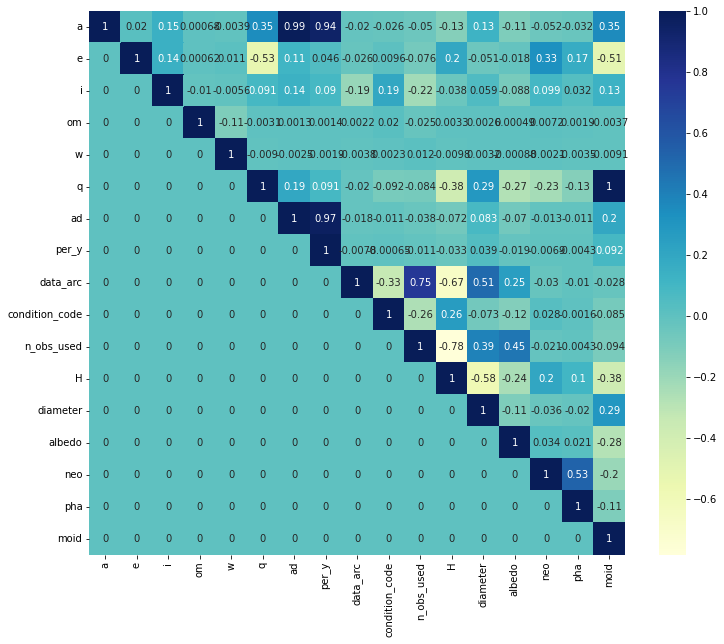

In [30]:
#Se crea una correlacion.
corr = (df_train.corr())

#Se toma la parte superior de la correlacion.
corr_tri_upper = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))

#Se toma la parte superior de la correlacion y se pasan los NaN a 0.
corr_tri_upper=corr_tri_upper.fillna(0)

#Para que se vean mejor los valores.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_tri_upper, annot=True,cmap="YlGnBu")
plt.show()

#Dejamos las variables que tengan una correlación mayor a 0.5 y menor a -0.3.
corr_tri_upper_filter=corr_tri_upper[((corr_tri_upper>0.5)|(corr_tri_upper<-0.3))]
corr_tri_upper_filter=corr_tri_upper_filter[corr_tri_upper_filter!=1]
corr_tri_upper_filter=(corr_tri_upper_filter.dropna(axis=1, how='all')).dropna( how='all')


df_train = df_train[list(set(list(corr_tri_upper_filter.index)+list(corr_tri_upper_filter.columns)))]

Veremos si existen datos repetidos. (No hay).

In [31]:
bool_series = df_train.duplicated()
bool_series.value_counts()

False    98837
dtype: int64

Finalmente, la base de datos queda de la siguiente manera.

In [32]:
df_train.head()

,diameter,a,condition_code,data_arc,ad,per_y,H,q,neo,n_obs_used,e,pha,moid
0,6.611,3.069866,0.0,6803.0,3.636003,5.378824,14.6,2.503729,0,614,0.184417,0,1.50522
1,4.255,2.386539,0.0,7672.0,2.636089,3.686897,14.7,2.136988,0,1247,0.104566,0,1.16197
2,5.625,3.018175,0.0,5904.0,3.273297,5.243544,15.6,2.763053,0,181,0.084529,0,1.79743
3,4.224,2.793049,0.0,25107.0,3.603633,4.667948,14.0,1.982465,0,955,0.290215,0,1.04034
4,3.525,2.721394,0.0,8027.0,2.989728,4.489472,16.4,2.453059,0,251,0.098602,0,1.46299


Como las escalas de las variables son distintas, las estandarizaremos. (A excepción de la columna "diameter" ya que es la que queremos predecir).

In [33]:
x = df_train.drop(['diameter'], axis=1)
y = df_train['diameter']

from sklearn.preprocessing import StandardScaler
x_standard = StandardScaler().fit_transform(x)

x_standard_1000 = StandardScaler().fit_transform(x.head(1000))
y_1000 = y.head(1000)

Además haremos PCA, solo para ver si es de utilidad en un futuro.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Components = pca.fit_transform(x_standard)
x_pca = pd.DataFrame(data = Components
             , columns = ['component 1', 'component 2'])

x_pca

,component 1,component 2
0,0.441613,0.170068
1,-0.610714,-0.923995
2,0.780732,0.636333
3,-0.461052,-1.580492
4,-0.166299,0.611686
...,...,...
73961,-0.772126,-2.910483
73962,-0.082627,0.940139
73963,0.964290,0.102699
73964,1.447548,-0.634783


# Parte 2.

2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones.

### Modelo y split 

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(x_standard_1000 , y_1000, random_state=133)

In [36]:
len(X_train)

750

In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

estimator = MLPRegressor()

#MLPRegressor(hidden_layer_sizes=(150,100,50),
 #                      max_iter = 300,activation = 'relu',
  #                     solver = 'adam')

#param_grid = {
 #   'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
  #  'max_iter': [50, 100, 200, 300],
   # 'activation': ['tanh', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
#}

param_grid = {
    'solver': ['sgd', 'adam', 'lbfgs']
}

gsc = GridSearchCV(estimator, param_grid, n_jobs= -1, cv=5)

grid_result = gsc.fit(X_train, y_train)

#parameters = {
 #             'activation': ['relu', 'logistic', 'tanh', 'identity'],
  #            'solver': ['lbfgs', 'sgd', 'adam'],
   #           'learning_rate': [0.01,0.02,0.03,0.04],
    #          'max_iter': [100, 200, 500, 1000]
             # }
#'hidden_layer_sizes': [3, 10, 20],
#'batch_size': ['auto'],

#(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_result.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_result.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_result.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 MLPRegressor(solver='sgd')

 The best score across ALL searched params:
 0.6444700501243565

 The best parameters across ALL searched params:
 {'solver': 'sgd'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


### Entrenamos el modelo.

MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', batch_size='auto',learning_rate_init=0.001,max_iter=200)</font>

Parámetros:
* hidden_layer_sizes: tupla con el número de neuronas para cada capa oculta.
* activation: Función de activación ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
* solver: "método de gradiente" a utilizar: ‘lbfgs’ (quasi-Newton methods), ‘sgd’ (stochastic gradiente descendent), ‘adam’.
* batch_size: tamaño del batch, “auto $\Rightarrow$, batch_size=min(200, n_samples).
* learning_rate_init: tasa de aprendizaje del algoritmo gradiente descendiente.
* max_iter: número de épocas

In [ ]:
modelo = MLPRegressor(hidden_layer_sizes=(10,10), activation = 'logistic', solver = 'adam', batch_size = 'auto', learning_rate_init = 0.001, max_iter = 200)
modelo_fit=modelo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


# Resultado del Entrenamiento

Función de activicación de salida identity
Error de entrenamiento final: 12.101706663521997
Mejor error de entrenamiento: 12.101706663521997


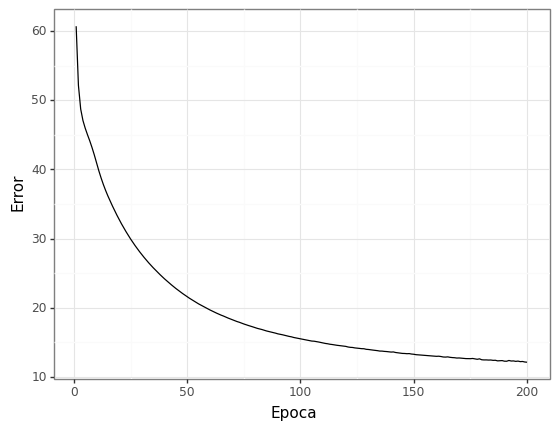

<ggplot: (8755505197173)>

In [ ]:
print("Función de activicación de salida",modelo_fit.out_activation_)
#Error final del modelo (entrenamiento)
print("Error de entrenamiento final:",modelo_fit.loss_)
#Mejor error del modelo (entrenamiento)
print("Mejor error de entrenamiento:",modelo_fit.best_loss_)

#Curva de aprendizaje
tempDF=pd.DataFrame(modelo_fit.loss_curve_,columns=["Error"])
tempDF["Epoca"]=range(1,tempDF.shape[0]+1)
ggplot(tempDF)+aes(x="Epoca",y="Error")+theme_bw()+geom_line()


In [ ]:
predict_train = modelo_fit.predict(X_train)
predict_test = modelo_fit.predict(X_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, predict_test))
print(modelo_fit.score(X_train, y_train))

0.8675191344163139
0.7437790342888373


In [ ]:
print("Sesgo para cada neurona")
print("Recordar que la primera oculta capa tiene 10 neuronas (10 sesgos/pesos)")
print("Número de sesgos, primera capa:",modelo_fit.intercepts_[0].shape)
print("Recordar que la segunda oculta capa (capa de salida) tiene 1 neurona (1 sesgo/peso)")
print("Número de sesgos, segunda capa:",modelo_fit.intercepts_[1].shape)
print(modelo_fit.intercepts_)

Sesgo para cada neurona
Recordar que la primera oculta capa tiene 10 neuronas (10 sesgos/pesos)
Número de sesgos, primera capa: (5,)
Recordar que la segunda oculta capa (capa de salida) tiene 1 neurona (1 sesgo/peso)
Número de sesgos, segunda capa: (6,)
[array([-2.20682992, -2.34236844, -4.66938227, -2.45760244,  0.11827399]), array([ 0.5463822 , -1.56263374,  0.67807515, -3.26937182, -0.12900671,
       -3.64440573]), array([0.54956894])]


In [ ]:
print("Sesgo para cada neurona")
print("Recordar que la capa de entrada tiene 2 neuronas y la primera capa oculta 10 neuronas")
print("Número de pesos, para la primera capa oculta:",modelo_fit.coefs_[0].shape)
print("Recordar que la capa de salida tiene 1 neurona")
print("Número de pesos, para la primera capa oculta:",modelo_fit.coefs_[1].shape)
print(modelo_fit.coefs_)

Sesgo para cada neurona
Recordar que la capa de entrada tiene 2 neuronas y la primera capa oculta 10 neuronas
Número de pesos, para la primera capa oculta: (10, 5)
Recordar que la capa de salida tiene 1 neurona
Número de pesos, para la primera capa oculta: (5, 6)
[array([[ 8.41326267e-01,  1.09003189e-01,  1.69840254e-01,
         3.77496237e-01,  4.47023252e-01],
       [-5.00208539e-01, -3.87139998e-01,  1.25551568e-01,
         1.23557860e-01,  6.13681834e-01],
       [ 4.27867545e-01, -9.50647647e-02, -2.61933660e-01,
         3.88929116e-01, -3.29651971e-01],
       [ 6.88945133e-01, -2.41132072e-01,  2.49726711e-01,
        -4.11644573e-01, -2.77493262e-02],
       [ 1.58112485e-01, -9.87081003e-01, -1.15837371e+00,
        -1.33758158e+00, -1.01070325e+00],
       [ 7.86667684e-01, -2.61293389e-01,  1.46601441e-02,
        -3.53211460e-02,  8.38786179e-01],
       [ 1.08495458e-01, -1.95082259e-02,  1.23799205e-01,
        -1.60775949e-02,  5.90653615e-02],
       [-1.80763067e+

# Predicion Eval

In [ ]:

df_eval=pd.read_csv("asteroidEval.csv")
df_eval.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.


,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,5368 Vitagliano (1984 SW5),3.969733,0.082587,NaN,6.263280,159.529531,338.904665,3.641886,4.297579,7.909520,...,59.36,NaN,NaN,NaN,NaN,NaN,NaN,N,N,2.656530
1,(2010 NM8),2.262880,0.096618,NaN,22.340191,52.502912,87.172523,2.044245,2.481515,3.404085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.174060
2,13345 (1998 SW132),3.072270,0.103533,NaN,9.503231,217.293949,191.020252,2.754189,3.390352,5.385145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.763990
3,66559 (1999 RB135),2.766916,0.208954,NaN,10.208236,161.123803,188.856431,2.188758,3.345075,4.602590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1.182110
4,132539 (2002 JF72),2.361788,0.259924,NaN,9.486384,100.768260,231.685109,1.747903,2.975672,3.629690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.753967


In [ ]:
df_eval=df_eval[list((df.drop("diameter",axis=1)).columns)]
df_eval_analy=data_discribe(df_eval)

,dtypes,N de NaNs
e,float64,0.000000
per_y,float64,0.000000
ad,float64,0.000000
a,float64,0.000000
H,float64,0.557310
q,float64,0.000000
data_arc,float64,0.124731
condition_code,float64,0.000000
moid,float64,0.000000
n_obs_used,int64,0.000000


In [ ]:
df_eval= df_eval.fillna(0)
df_eval= StandardScaler().fit_transform(df_eval.select_dtypes(include="number"))


predict_eval= modelo_fit.predict(df_eval)
predict_eval

array([36.06500606,  2.53773918,  9.93327359, ...,  2.53773918,
        3.1843335 ,  3.66937584])